### 1: Initial Data Process and Outlier Removal
Visualization of all data, removal of outliers.

In [1]:
# Imports and function definitions
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python 
import pandas as pd
import numpy as np                        # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics

class Univariate():
    def __init__(self,welldata):
        self.filename = welldata # set filename
        self.welldata = pd.read_csv(welldata) # read well data into dataframe
        #self.sandstone = self.welldata.loc[(data.welldata['Facies'] == 1)] # Group by facies (Sandstone)
        #self.shale = self.welldata.loc[(data.welldata['Facies'] == 0)] # Group by facies (Shale)

        
    def comp_outliers(self,dataframe,metric):
        # computes the upper and lower fence based on Tukey 1.5 x IQR method and returns an array of format 
        # [lower_fence,upper_fence]
        P25 = np.percentile(dataframe[metric].values,25)
        P75 = np.percentile(dataframe[metric].values,75)
        lower_fence = P25 - 1.5*(P75-P25)
        upper_fence = P75 + 1.5*(P75-P25)
        if lower_fence < 0.0:
            lower_fence = 0.0
        return [lower_fence,upper_fence]
    
    def remove_outliers(self,dataframe,metric):
        # removes outliers from dataframe and returns new dataframe without outliers
        bounds = self.comp_outliers(dataframe,metric)
        cleaned_data = dataframe.loc[(dataframe[metric] >= bounds[0]) & (dataframe[metric] <= bounds[1])]
        return cleaned_data 

In [3]:
data = Univariate('../Data/1_sample_data.csv')
df = pd.read_csv('../Data/1_sample_data.csv')     # load our data table (wrong name!)

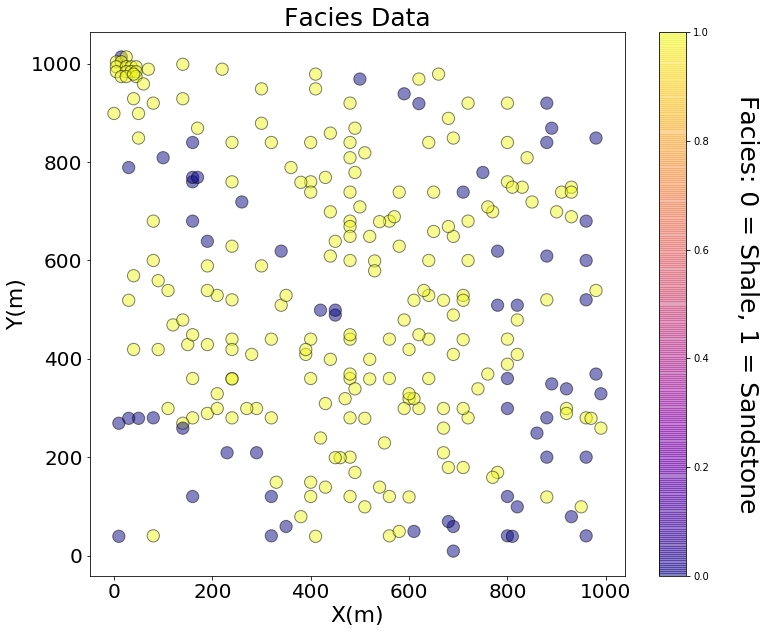

In [91]:
# plotting initial data
plt.figure(figsize=(12,10))
plt.scatter(df['X'],df['Y'],s=150,c=df['Facies'],
           marker=None,cmap=plt.cm.plasma,norm=None,vmin=0.00,
           vmax=1.00,alpha=0.5,verts=None,edgecolors="black")
plt.title('Facies Data', size=25)
plt.xlabel('X(m)', size=22)
plt.xticks(fontsize=20)
plt.ylabel('Y(m)', size=22)
plt.yticks(fontsize=20)
cbar = plt.colorbar(orientation = 'vertical')
cbar.set_label('Facies: 0 = Shale, 1 = Sandstone',rotation=270,labelpad=50,size=25)
plt.show()

In [62]:
# doing facies separation and outlier removal
# pulling out the raw facies data
Sandstone_raw = data.welldata.loc[(data.welldata['Facies'] == 1)]
Shale_raw = data.welldata.loc[(data.welldata['Facies'] == 0)]
# outlier removal for sandstone (porosity, permeability, acoustic impedance)
Sandstone_cleaned_por = data.remove_outliers(Sandstone_raw,'Porosity')
Sandstone_cleaned_por_perm = data.remove_outliers(Sandstone_cleaned_por,'Perm')
Sandstone_final = data.remove_outliers(Sandstone_cleaned_por_perm,'AI')
# outlier removal for shale (porosity, permeability, acoustic impedance)
Shale_cleaned_por = data.remove_outliers(Shale_raw,'Porosity')
Shale_cleaned_por_perm = data.remove_outliers(Shale_cleaned_por,'Perm')
Shale_final = data.remove_outliers(Shale_cleaned_por_perm,'AI')

In [63]:
# combining facies for total 'cleaned' dataset
df_clean = pd.concat([Sandstone_final,Shale_final])
del df_clean['Unnamed: 0']

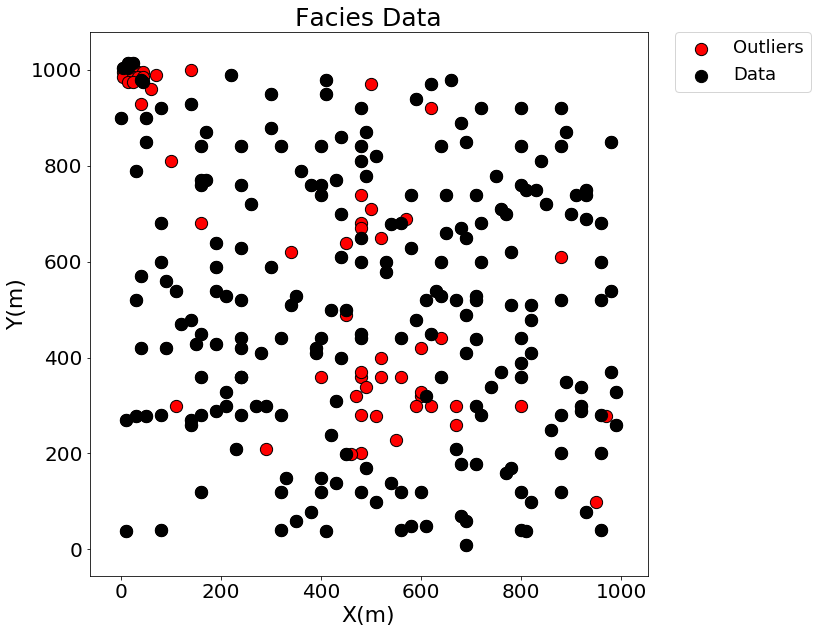

In [87]:
# plotting initial data
plt.figure(figsize=(10,10))
plt.scatter(df['X'],df['Y'],s=150,c='red',
           marker=None,cmap=plt.cm.plasma,norm=None,vmin=0.00,
           vmax=1.00,alpha=1.0,verts=None,edgecolors="black",label='Outliers')
plt.scatter(df_clean['X'],df_clean['Y'],s=150,c='black',
           marker=None,cmap=plt.cm.plasma,norm=None,vmin=0.00,
           vmax=1.00,alpha=1.0,verts=None,edgecolors="black",label='Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=18)
plt.title('Facies Data', size=25)
plt.xlabel('X(m)', size=22)
plt.xticks(fontsize=20)
plt.ylabel('Y(m)', size=22)
plt.yticks(fontsize=20)
plt.show()

In [89]:
# save the clean data
df_clean.to_csv('df_clean.csv')